In [328]:
import pandas as pd
import pymysql
import sqlalchemy
from urllib import parse

user = 'hyun'
password = 'hyun'
host='172.20.224.1'
port = 3306
database = 'KPI'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [120]:
customers = pd.read_sql_query("SELECT * FROM customers", con=engine)
locations = pd.read_sql_query("SELECT * FROM locations", con=engine)
order_items = pd.read_sql_query("SELECT * FROM order_items", con=engine)
orders = pd.read_sql_query("SELECT * FROM orders", con=engine)
payments = pd.read_sql_query("SELECT * FROM payments", con=engine)
products = pd.read_sql_query("SELECT * FROM products", con=engine)
reviews = pd.read_sql_query("SELECT * FROM reviews", con=engine)
sellers = pd.read_sql_query("SELECT * FROM sellers", con=engine)

## 거리<> 운임  
  
운임비와 판매 수량의 상관관계  
운임비와 상품의 무게의 상관관계 (0.7)  

### Freight_value 를 제품당 가격으로 친다고 가정 하에 진행
Order_id 마다 총 상품 가격 대비 총 운임료의 퍼센트에 따라 구매와 상관관계가 있을까?  
근데 이거는 생각해보니까 배송비가 일정하지 않고 사람마다 다르기 때문에 구하는 의미가 없는 값인 것 같다  
그리고 제품마다 배송비다 붙으면 판매 수량은 관계 없을 듯

In [5]:
order_items

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.90,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.90,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.00,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.90,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.90,12.69
...,...,...,...,...,...,...
100552,ORDER_70405,1,PRODUCT_04209,SELLER_2078,299.99,43.41
100553,ORDER_62069,1,PRODUCT_08229,SELLER_1593,350.00,36.53
100554,ORDER_46632,1,PRODUCT_21462,SELLER_0528,99.90,16.95
100555,ORDER_52966,1,PRODUCT_19978,SELLER_2563,55.99,8.72


## 기대 배송일자 단축   
  
기대배송일자 <> 매출액 음의 상관관계 (-0.66)   
더 줄여서 소비자에게 통보하고 이 기한 내에 배송  

In [20]:
orders

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07
...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15


## 재구매 한 번 볼까?
- 재구매 한 사람에게서 나타나는 수치(예: 주문 후 평균 배송 준비기간이나 배송 도착 기간이 어떻다..)
- 멸망!

In [21]:
Customer_unique_id = customers[['Customer_unique_id', 'Customer_id']]

In [22]:
orders2 = pd.merge(orders, Customer_unique_id, on='Customer_id', how='inner')

In [23]:
# 주문 후 준비 소요 기간 : ready_time
# 주문 후 도착 소요 기간 : delivered_time

In [24]:
orders2

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Customer_unique_id
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,CUSTOMER_Unique_60785
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,CUSTOMER_Unique_52983
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,CUSTOMER_Unique_58227
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,CUSTOMER_Unique_59164
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,CUSTOMER_Unique_74753
...,...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,CUSTOMER_Unique_52545
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,CUSTOMER_Unique_67637
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,CUSTOMER_Unique_17508
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,CUSTOMER_Unique_14906


In [26]:
orders2['ready_time']= orders2['Order_delivered_carrier_date'] - orders2['Order_purchase_timestamp']
orders2['delivered_time']= orders2['Order_delivered_customer_date'] - orders2['Order_purchase_timestamp']

In [30]:
orders2.drop(columns=['Order_status', 'Order_status', 'Order_purchase_timestamp', 'Order_delivered_carrier_date',
                      'Order_delivered_customer_date', 'Order_estimated_delivery_date'], inplace=True)

In [31]:
orders2

,Order_id,Customer_id,Customer_unique_id,ready_time,delivered_time
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,2 days 08:58:27,8 days 10:28:40
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,3 days 18:11:53,13 days 05:00:36
2,ORDER_00002,CUSTOMER_59535,CUSTOMER_Unique_58227,0 days 22:27:55,2 days 20:58:23
3,ORDER_00003,CUSTOMER_60516,CUSTOMER_Unique_59164,1 days 17:00:59,16 days 13:00:50
4,ORDER_00004,CUSTOMER_76957,CUSTOMER_Unique_74753,5 days 20:57:16,9 days 23:45:21
...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,CUSTOMER_Unique_52545,1 days 01:23:58,8 days 05:13:56
87951,ORDER_88084,CUSTOMER_69438,CUSTOMER_Unique_67637,1 days 10:23:44,22 days 04:38:58
87952,ORDER_88085,CUSTOMER_17637,CUSTOMER_Unique_17508,1 days 06:05:43,24 days 20:37:34
87953,ORDER_88086,CUSTOMER_15001,CUSTOMER_Unique_14906,3 days 18:06:36,17 days 02:04:27


In [40]:
orders2['order_counts'] = orders2.groupby('Customer_unique_id')['Order_id'].transform('count')

In [41]:
orders2

,Order_id,Customer_id,Customer_unique_id,ready_time,delivered_time,order_counts
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,2 days 08:58:27,8 days 10:28:40,2
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,3 days 18:11:53,13 days 05:00:36,1
2,ORDER_00002,CUSTOMER_59535,CUSTOMER_Unique_58227,0 days 22:27:55,2 days 20:58:23,1
3,ORDER_00003,CUSTOMER_60516,CUSTOMER_Unique_59164,1 days 17:00:59,16 days 13:00:50,1
4,ORDER_00004,CUSTOMER_76957,CUSTOMER_Unique_74753,5 days 20:57:16,9 days 23:45:21,1
...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,CUSTOMER_Unique_52545,1 days 01:23:58,8 days 05:13:56,1
87951,ORDER_88084,CUSTOMER_69438,CUSTOMER_Unique_67637,1 days 10:23:44,22 days 04:38:58,1
87952,ORDER_88085,CUSTOMER_17637,CUSTOMER_Unique_17508,1 days 06:05:43,24 days 20:37:34,1
87953,ORDER_88086,CUSTOMER_15001,CUSTOMER_Unique_14906,3 days 18:06:36,17 days 02:04:27,1


In [43]:
repurchase = orders2.loc[orders2['order_counts']>1]

In [45]:
repurchase.loc[repurchase['Customer_unique_id']=='CUSTOMER_Unique_60785']

,Order_id,Customer_id,Customer_unique_id,ready_time,delivered_time,order_counts
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,2 days 08:58:27,8 days 10:28:40,2
54898,ORDER_54984,CUSTOMER_66393,CUSTOMER_Unique_60785,0 days 09:55:37,1 days 07:53:42,2


In [49]:
repurchase.drop(columns=['Order_id', 'Customer_id'], inplace=True)

/tmp/ipykernel_7215/3957732847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repurchase.drop(columns=['Order_id', 'Customer_id'], inplace=True)


In [50]:
repurchase

,Customer_unique_id,ready_time,delivered_time,order_counts
0,CUSTOMER_Unique_60785,2 days 08:58:27,8 days 10:28:40,2
12,CUSTOMER_Unique_01788,3 days 19:50:48,13 days 20:31:20,2
13,CUSTOMER_Unique_62455,0 days 23:18:26,17 days 06:38:16,2
40,CUSTOMER_Unique_01137,1 days 11:49:21,10 days 12:46:06,2
51,CUSTOMER_Unique_08998,8 days 19:48:33,23 days 19:22:40,3
...,...,...,...,...
87825,CUSTOMER_Unique_32745,2 days 15:07:36,15 days 05:27:03,3
87837,CUSTOMER_Unique_30133,3 days 03:33:02,7 days 09:50:58,2
87868,CUSTOMER_Unique_33946,3 days 04:54:56,10 days 06:24:20,2
87933,CUSTOMER_Unique_63775,1 days 11:40:44,4 days 08:12:50,2


In [55]:
repurchase2 = repurchase.groupby(['Customer_unique_id', 'order_counts']).mean().reset_index()

In [56]:
repurchase2

,Customer_unique_id,order_counts,ready_time,delivered_time
0,CUSTOMER_Unique_00004,2,3 days 05:17:15,12 days 01:47:01.500000
1,CUSTOMER_Unique_00007,2,0 days 10:58:25,6 days 17:59:08
2,CUSTOMER_Unique_00012,2,2 days 18:16:51,6 days 18:58:46.500000
3,CUSTOMER_Unique_00030,2,2 days 07:57:45.500000,44 days 18:26:41
4,CUSTOMER_Unique_00031,2,7 days 13:29:26.500000,16 days 08:11:00.500000
...,...,...,...,...
2553,CUSTOMER_Unique_81626,2,2 days 10:32:53,4 days 10:01:08
2554,CUSTOMER_Unique_82027,2,6 days 14:55:08.500000,11 days 10:33:13.500000
2555,CUSTOMER_Unique_82450,2,1 days 17:39:48.500000,13 days 04:17:59.500000
2556,CUSTOMER_Unique_82832,2,1 days 20:55:00.500000,7 days 08:10:08


In [58]:
corr_1 = repurchase2['order_counts'].corr(repurchase2['ready_time'])

In [59]:
corr_2 = repurchase2['order_counts'].corr(repurchase2['delivered_time'])

In [60]:
corr_1

-0.0016387039738739375

In [61]:
corr_2

-0.014838424804822791

## 다른 거!

In [62]:
## 재주문한 고객들이 주문하는 요일에 대해서 구해보고
## 특정 요일이 나오면 해당 요일에 쿠폰 제공?

In [94]:
day = orders[['Order_id', 'Customer_id', 'Order_purchase_timestamp']]

In [95]:
day = pd.merge(day, Customer_unique_id, on='Customer_id', how='inner')

In [96]:
day

,Order_id,Customer_id,Order_purchase_timestamp,Customer_unique_id
0,ORDER_00000,CUSTOMER_62232,2018-10-02 10:56:33,CUSTOMER_Unique_60785
1,ORDER_00001,CUSTOMER_54059,2018-11-18 19:28:06,CUSTOMER_Unique_52983
2,ORDER_00002,CUSTOMER_59535,2019-02-13 21:18:39,CUSTOMER_Unique_58227
3,ORDER_00003,CUSTOMER_60516,2018-07-09 21:57:05,CUSTOMER_Unique_59164
4,ORDER_00004,CUSTOMER_76957,2018-05-16 13:10:30,CUSTOMER_Unique_74753
...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,2018-03-09 09:54:05,CUSTOMER_Unique_52545
87951,ORDER_88084,CUSTOMER_69438,2019-02-06 12:58:58,CUSTOMER_Unique_67637
87952,ORDER_88085,CUSTOMER_17637,2018-08-27 14:46:43,CUSTOMER_Unique_17508
87953,ORDER_88086,CUSTOMER_15001,2019-01-08 21:28:27,CUSTOMER_Unique_14906


In [97]:
day['Day'] = day['Order_purchase_timestamp'].dt.day_name()

In [103]:
day.drop(columns = 'Order_purchase_timestamp', inplace=True)

In [104]:
day

,Order_id,Customer_id,Customer_unique_id,Day
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,Tuesday
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday
2,ORDER_00002,CUSTOMER_59535,CUSTOMER_Unique_58227,Wednesday
3,ORDER_00003,CUSTOMER_60516,CUSTOMER_Unique_59164,Monday
4,ORDER_00004,CUSTOMER_76957,CUSTOMER_Unique_74753,Wednesday
...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,CUSTOMER_Unique_52545,Friday
87951,ORDER_88084,CUSTOMER_69438,CUSTOMER_Unique_67637,Wednesday
87952,ORDER_88085,CUSTOMER_17637,CUSTOMER_Unique_17508,Monday
87953,ORDER_88086,CUSTOMER_15001,CUSTOMER_Unique_14906,Tuesday


In [109]:
day.groupby(['Order_id', 'Customer_id', 'Customer_unique_id', 'Day']).first().reset_index()

,Order_id,Customer_id,Customer_unique_id,Day
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,Tuesday
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday
2,ORDER_00002,CUSTOMER_59535,CUSTOMER_Unique_58227,Wednesday
3,ORDER_00003,CUSTOMER_60516,CUSTOMER_Unique_59164,Monday
4,ORDER_00004,CUSTOMER_76957,CUSTOMER_Unique_74753,Wednesday
...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,CUSTOMER_Unique_52545,Friday
87951,ORDER_88084,CUSTOMER_69438,CUSTOMER_Unique_67637,Wednesday
87952,ORDER_88085,CUSTOMER_17637,CUSTOMER_Unique_17508,Monday
87953,ORDER_88086,CUSTOMER_15001,CUSTOMER_Unique_14906,Tuesday


In [135]:
day['Day'].value_counts()
# 소비자가 막 그렇게 선호하는 요일은 없네
# 일요일은 좀 적은 거 같은데 프로모션 돌려서 요일 전체의 판매 건수 비슷하게 한다거나,,

Day
Tuesday      14312
Wednesday    14078
Thursday     13744
Friday       13038
Saturday     12517
Monday       10639
Sunday        9627
Name: count, dtype: int64

In [136]:
# 요일별 판매액을 비교해볼까,,?

In [137]:
order_items

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.90,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.90,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.00,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.90,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.90,12.69
...,...,...,...,...,...,...
100552,ORDER_70405,1,PRODUCT_04209,SELLER_2078,299.99,43.41
100553,ORDER_62069,1,PRODUCT_08229,SELLER_1593,350.00,36.53
100554,ORDER_46632,1,PRODUCT_21462,SELLER_0528,99.90,16.95
100555,ORDER_52966,1,PRODUCT_19978,SELLER_2563,55.99,8.72


In [140]:
price = order_items.copy()

In [141]:
# Order_id,  Product_id , Seller_id , Price 동일한 경우 카운트 붙이기
price['Count'] = order_items.groupby(['Order_id', 'Product_id', 'Seller_id','Price'])['Order_item_id'].transform('count')

In [142]:
price

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value,Count
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.90,13.29,1
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.90,19.93,1
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.00,17.87,1
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.90,18.14,1
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.90,12.69,1
...,...,...,...,...,...,...,...
100552,ORDER_70405,1,PRODUCT_04209,SELLER_2078,299.99,43.41,1
100553,ORDER_62069,1,PRODUCT_08229,SELLER_1593,350.00,36.53,1
100554,ORDER_46632,1,PRODUCT_21462,SELLER_0528,99.90,16.95,1
100555,ORDER_52966,1,PRODUCT_19978,SELLER_2563,55.99,8.72,1


In [148]:
price2 = price.groupby(['Order_id', 'Product_id', 'Seller_id','Price', 'Count']).sum().reset_index()

In [151]:
price2

,Order_id,Product_id,Seller_id,Price,Count,Order_item_id,Freight_value
0,ORDER_00000,PRODUCT_02093,SELLER_0491,29.99,1,1,8.72
1,ORDER_00001,PRODUCT_26747,SELLER_2662,45.00,1,1,27.20
2,ORDER_00002,PRODUCT_10598,SELLER_1354,19.90,1,1,8.72
3,ORDER_00003,PRODUCT_16703,SELLER_1518,147.90,1,1,27.36
4,ORDER_00004,PRODUCT_08274,SELLER_1599,59.99,1,1,15.17
...,...,...,...,...,...,...,...
91293,ORDER_88083,PRODUCT_16488,SELLER_2296,72.00,1,1,13.08
91294,ORDER_88084,PRODUCT_01588,SELLER_0031,174.90,1,1,20.10
91295,ORDER_88085,PRODUCT_13335,SELLER_1892,205.99,1,1,65.02
91296,ORDER_88086,PRODUCT_07372,SELLER_2445,179.99,2,3,81.18


In [153]:
# Freight_value 는 주문자의 지역마다 다르기 때문에 버릴 예정, Seller_id , Order_item_id 역시 무쓸모라 드랍
price2.drop(columns = ['Order_item_id', 'Freight_value', 'Seller_id'], inplace=True)

In [154]:
price2

,Order_id,Product_id,Price,Count
0,ORDER_00000,PRODUCT_02093,29.99,1
1,ORDER_00001,PRODUCT_26747,45.00,1
2,ORDER_00002,PRODUCT_10598,19.90,1
3,ORDER_00003,PRODUCT_16703,147.90,1
4,ORDER_00004,PRODUCT_08274,59.99,1
...,...,...,...,...
91293,ORDER_88083,PRODUCT_16488,72.00,1
91294,ORDER_88084,PRODUCT_01588,174.90,1
91295,ORDER_88085,PRODUCT_13335,205.99,1
91296,ORDER_88086,PRODUCT_07372,179.99,2


In [155]:
price2['Money'] = price2['Price'] * price2['Count']

In [165]:
price2

,Order_id,Product_id,Price,Count,Money
0,ORDER_00000,PRODUCT_02093,29.99,1,29.99
1,ORDER_00001,PRODUCT_26747,45.00,1,45.00
2,ORDER_00002,PRODUCT_10598,19.90,1,19.90
3,ORDER_00003,PRODUCT_16703,147.90,1,147.90
4,ORDER_00004,PRODUCT_08274,59.99,1,59.99
...,...,...,...,...,...
91293,ORDER_88083,PRODUCT_16488,72.00,1,72.00
91294,ORDER_88084,PRODUCT_01588,174.90,1,174.90
91295,ORDER_88085,PRODUCT_13335,205.99,1,205.99
91296,ORDER_88086,PRODUCT_07372,179.99,2,359.98


In [164]:
price2.duplicated(['Order_id']).value_counts()

False    87954
True      3344
Name: count, dtype: int64

In [166]:
price3 = price2[['Order_id', 'Money']]

In [167]:
price3

,Order_id,Money
0,ORDER_00000,29.99
1,ORDER_00001,45.00
2,ORDER_00002,19.90
3,ORDER_00003,147.90
4,ORDER_00004,59.99
...,...,...
91293,ORDER_88083,72.00
91294,ORDER_88084,174.90
91295,ORDER_88085,205.99
91296,ORDER_88086,359.98


In [170]:
price4 = price3.groupby(['Order_id']).sum().reset_index()

In [172]:
price4
# 오더마다 판매금액(price 값만..)

,Order_id,Money
0,ORDER_00000,29.99
1,ORDER_00001,45.00
2,ORDER_00002,19.90
3,ORDER_00003,147.90
4,ORDER_00004,59.99
...,...,...
87949,ORDER_88083,72.00
87950,ORDER_88084,174.90
87951,ORDER_88085,205.99
87952,ORDER_88086,359.98


In [175]:
day_money = pd.merge(day, price4, on='Order_id', how='inner')

In [176]:
day_money

,Order_id,Customer_id,Customer_unique_id,Day,Money
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,Tuesday,29.99
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday,45.00
2,ORDER_00002,CUSTOMER_59535,CUSTOMER_Unique_58227,Wednesday,19.90
3,ORDER_00003,CUSTOMER_60516,CUSTOMER_Unique_59164,Monday,147.90
4,ORDER_00004,CUSTOMER_76957,CUSTOMER_Unique_74753,Wednesday,59.99
...,...,...,...,...,...
87949,ORDER_88083,CUSTOMER_53611,CUSTOMER_Unique_52545,Friday,72.00
87950,ORDER_88084,CUSTOMER_69438,CUSTOMER_Unique_67637,Wednesday,174.90
87951,ORDER_88085,CUSTOMER_17637,CUSTOMER_Unique_17508,Monday,205.99
87952,ORDER_88086,CUSTOMER_15001,CUSTOMER_Unique_14906,Tuesday,359.98


In [178]:
dm_1 = day_money['Day'].corr(day_money['Money'])

ValueError: could not convert string to float: 'Tuesday'

In [179]:
# 날짜는 안 된다고 해서...
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

In [182]:
day_money['Day2'] = day_money['Day'].map(day_mapping)

In [183]:
day_money

,Order_id,Customer_id,Customer_unique_id,Day,Money,Day2
0,ORDER_00000,CUSTOMER_62232,CUSTOMER_Unique_60785,Tuesday,29.99,1
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday,45.00,6
2,ORDER_00002,CUSTOMER_59535,CUSTOMER_Unique_58227,Wednesday,19.90,2
3,ORDER_00003,CUSTOMER_60516,CUSTOMER_Unique_59164,Monday,147.90,0
4,ORDER_00004,CUSTOMER_76957,CUSTOMER_Unique_74753,Wednesday,59.99,2
...,...,...,...,...,...,...
87949,ORDER_88083,CUSTOMER_53611,CUSTOMER_Unique_52545,Friday,72.00,4
87950,ORDER_88084,CUSTOMER_69438,CUSTOMER_Unique_67637,Wednesday,174.90,2
87951,ORDER_88085,CUSTOMER_17637,CUSTOMER_Unique_17508,Monday,205.99,0
87952,ORDER_88086,CUSTOMER_15001,CUSTOMER_Unique_14906,Tuesday,359.98,1


In [184]:
dm_1 = day_money['Day2'].corr(day_money['Money'])

In [186]:
dm_1
# 요일과 판매 금액의 상관계수는 없다고 하네..

0.0064994265886445775

In [189]:
day_money2 = day_money[['Day','Money']]

In [190]:
day_money2

,Day,Money
0,Tuesday,29.99
1,Sunday,45.00
2,Wednesday,19.90
3,Monday,147.90
4,Wednesday,59.99
...,...,...
87949,Friday,72.00
87950,Wednesday,174.90
87951,Monday,205.99
87952,Tuesday,359.98


In [200]:
day_money3 = day_money2.groupby(['Day']).sum().reset_index()

In [203]:
day_money3.sort_values(by='Money', ascending=False)

,Day,Money
5,Tuesday,1978292.76
6,Wednesday,1930987.26
4,Thursday,1857728.87
0,Friday,1786067.39
2,Saturday,1754295.09
1,Monday,1409342.85
3,Sunday,1332164.93


In [213]:
day_money['Day'].value_counts()

Day
Tuesday      14312
Wednesday    14078
Thursday     13744
Friday       13037
Saturday     12517
Monday       10639
Sunday        9627
Name: count, dtype: int64

In [206]:
# 엥.. 있는 거 같은데
# 아 합치고 해야했네 허허

In [212]:
a =pd.DataFrame(a).reset_index()

In [207]:
a=day_money['Day'].value_counts()

In [214]:
day_money_counts = pd.merge(day_money3, a, on='Day', how='inner')

In [215]:
day_money_counts

,Day,Money,count
0,Friday,1786067.39,13037
1,Monday,1409342.85,10639
2,Saturday,1754295.09,12517
3,Sunday,1332164.93,9627
4,Thursday,1857728.87,13744
5,Tuesday,1978292.76,14312
6,Wednesday,1930987.26,14078


In [216]:
day_money_counts['avg'] = day_money_counts['Money'] / day_money_counts['count']

In [219]:
day_money_counts

,Day,Money,count,avg
0,Friday,1786067.39,13037,136.999877
1,Monday,1409342.85,10639,132.469485
2,Saturday,1754295.09,12517,140.152999
3,Sunday,1332164.93,9627,138.377992
4,Thursday,1857728.87,13744,135.166536
5,Tuesday,1978292.76,14312,138.226157
6,Wednesday,1930987.26,14078,137.163465


In [221]:
day_money_counts.sort_values(by='avg', ascending=False)

,Day,Money,count,avg
2,Saturday,1754295.09,12517,140.152999
3,Sunday,1332164.93,9627,138.377992
5,Tuesday,1978292.76,14312,138.226157
6,Wednesday,1930987.26,14078,137.163465
0,Friday,1786067.39,13037,136.999877
4,Thursday,1857728.87,13744,135.166536
1,Monday,1409342.85,10639,132.469485


In [224]:
# 일요일 구매 횟수는 제일 낮은데 평균 사용 금액은 2위?
# 일요일에 구매하면 더 많이 구매하게 된다고 볼 수 있다 하고...(제발..)
# 일요일 구매자를 늘리도록 하자??

In [226]:
order_items

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.90,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.90,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.00,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.90,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.90,12.69
...,...,...,...,...,...,...
100552,ORDER_70405,1,PRODUCT_04209,SELLER_2078,299.99,43.41
100553,ORDER_62069,1,PRODUCT_08229,SELLER_1593,350.00,36.53
100554,ORDER_46632,1,PRODUCT_21462,SELLER_0528,99.90,16.95
100555,ORDER_52966,1,PRODUCT_19978,SELLER_2563,55.99,8.72


In [234]:
Sun = day_money.loc[day_money['Day']=='Sunday']

In [235]:
Sun

,Order_id,Customer_id,Customer_unique_id,Day,Money,Day2
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday,45.00,6
6,ORDER_00006,CUSTOMER_80326,CUSTOMER_Unique_77924,Sunday,149.99,6
19,ORDER_00019,CUSTOMER_81462,CUSTOMER_Unique_78997,Sunday,9.50,6
29,ORDER_00029,CUSTOMER_42362,CUSTOMER_Unique_41676,Sunday,84.90,6
31,ORDER_00031,CUSTOMER_53861,CUSTOMER_Unique_52791,Sunday,78.00,6
...,...,...,...,...,...,...
87894,ORDER_88028,CUSTOMER_85357,CUSTOMER_Unique_82677,Sunday,99.00,6
87901,ORDER_88035,CUSTOMER_15679,CUSTOMER_Unique_15573,Sunday,31.50,6
87903,ORDER_88037,CUSTOMER_51935,CUSTOMER_Unique_50934,Sunday,360.00,6
87922,ORDER_88056,CUSTOMER_10090,CUSTOMER_Unique_10051,Sunday,399.99,6


In [272]:
order_product=order_items[['Order_id', 'Product_id',]]

In [240]:
product_category=products[['Product_id', 'Product_category_name']]

In [273]:
order_product

,Order_id,Product_id
0,ORDER_75477,PRODUCT_23128
1,ORDER_63604,PRODUCT_24351
2,ORDER_05566,PRODUCT_20226
3,ORDER_04632,PRODUCT_07878
4,ORDER_61452,PRODUCT_03505
...,...,...
100552,ORDER_70405,PRODUCT_04209
100553,ORDER_62069,PRODUCT_08229
100554,ORDER_46632,PRODUCT_21462
100555,ORDER_52966,PRODUCT_19978


In [242]:
product_category

,Product_id,Product_category_name
0,PRODUCT_00000,perfumery
1,PRODUCT_00001,arts
2,PRODUCT_00002,sports_leisure
3,PRODUCT_00003,home_utilities
4,PRODUCT_00004,musical_instruments
...,...,...
29466,PRODUCT_29466,furniture_decor
29467,PRODUCT_29467,construction_tools_lighting
29468,PRODUCT_29468,bed_bath_table
29469,PRODUCT_29469,computers_accessories


In [243]:
order_product_category = pd.merge(order_product, product_category, on='Product_id', how='inner')

In [244]:
order_product_category

,Order_id,Product_id,Product_category_name
0,ORDER_75477,PRODUCT_23128,cool_stuff
1,ORDER_63604,PRODUCT_24351,pet_shop
2,ORDER_05566,PRODUCT_20226,furniture_decor
3,ORDER_04632,PRODUCT_07878,garden_tools
4,ORDER_61452,PRODUCT_03505,home_utilities
...,...,...,...
100552,ORDER_70405,PRODUCT_04209,home_utilities
100553,ORDER_62069,PRODUCT_08229,computers_accessories
100554,ORDER_46632,PRODUCT_21462,sports_leisure
100555,ORDER_52966,PRODUCT_19978,computers_accessories


In [245]:
Sun

,Order_id,Customer_id,Customer_unique_id,Day,Money,Day2
1,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday,45.00,6
6,ORDER_00006,CUSTOMER_80326,CUSTOMER_Unique_77924,Sunday,149.99,6
19,ORDER_00019,CUSTOMER_81462,CUSTOMER_Unique_78997,Sunday,9.50,6
29,ORDER_00029,CUSTOMER_42362,CUSTOMER_Unique_41676,Sunday,84.90,6
31,ORDER_00031,CUSTOMER_53861,CUSTOMER_Unique_52791,Sunday,78.00,6
...,...,...,...,...,...,...
87894,ORDER_88028,CUSTOMER_85357,CUSTOMER_Unique_82677,Sunday,99.00,6
87901,ORDER_88035,CUSTOMER_15679,CUSTOMER_Unique_15573,Sunday,31.50,6
87903,ORDER_88037,CUSTOMER_51935,CUSTOMER_Unique_50934,Sunday,360.00,6
87922,ORDER_88056,CUSTOMER_10090,CUSTOMER_Unique_10051,Sunday,399.99,6


In [249]:
Sun_category = pd.merge(Sun, order_product_category, on='Order_id', how='left')

In [250]:
Sun_category

,Order_id,Customer_id,Customer_unique_id,Day,Money,Day2,Product_id,Product_category_name
0,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday,45.00,6,PRODUCT_26747,pet_shop
1,ORDER_00006,CUSTOMER_80326,CUSTOMER_Unique_77924,Sunday,149.99,6,PRODUCT_25688,office_furniture
2,ORDER_00019,CUSTOMER_81462,CUSTOMER_Unique_78997,Sunday,9.50,6,PRODUCT_07528,electronics
3,ORDER_00029,CUSTOMER_42362,CUSTOMER_Unique_41676,Sunday,84.90,6,PRODUCT_28621,toys
4,ORDER_00031,CUSTOMER_53861,CUSTOMER_Unique_52791,Sunday,78.00,6,PRODUCT_18754,garden_tools
...,...,...,...,...,...,...,...,...
10832,ORDER_88028,CUSTOMER_85357,CUSTOMER_Unique_82677,Sunday,99.00,6,PRODUCT_01261,sports_leisure
10833,ORDER_88035,CUSTOMER_15679,CUSTOMER_Unique_15573,Sunday,31.50,6,PRODUCT_02524,health_beauty
10834,ORDER_88037,CUSTOMER_51935,CUSTOMER_Unique_50934,Sunday,360.00,6,PRODUCT_17425,garden_tools
10835,ORDER_88056,CUSTOMER_10090,CUSTOMER_Unique_10051,Sunday,399.99,6,PRODUCT_09391,furniture_mattress_and_upholstery


In [254]:
Sun_category['Product_category_name'].value_counts()
# 이건 판매 갯수 구한 거임

Product_category_name
bed_bath_table               1191
health_beauty                 866
furniture_decor               833
sports_leisure                786
computers_accessories         682
                             ... 
fashion_sport                   2
musical_cds_dvds                1
fashion_childrens_clothes       1
fashion_womens_clothing         1
music                           1
Name: count, Length: 70, dtype: int64

In [252]:
Sun_category['Order_id'].value_counts()

Order_id
ORDER_72634    11
ORDER_18072     8
ORDER_03933     7
ORDER_19474     7
ORDER_83013     7
               ..
ORDER_30592     1
ORDER_30594     1
ORDER_30595     1
ORDER_30597     1
ORDER_30542     1
Name: count, Length: 9627, dtype: int64

In [265]:
Sun_category2 =  Sun_category.groupby(['Order_id', 'Customer_id', 'Customer_unique_id', 'Day', 'Money', 'Day2', 'Product_id','Product_category_name']).first().reset_index()

In [264]:
Sun_category2

,Order_id,Customer_id,Customer_unique_id,Day,Money,Day2,Product_id,Product_category_name
0,ORDER_00001,CUSTOMER_54059,CUSTOMER_Unique_52983,Sunday,45.00,6,PRODUCT_26747,pet_shop
1,ORDER_00006,CUSTOMER_80326,CUSTOMER_Unique_77924,Sunday,149.99,6,PRODUCT_25688,office_furniture
2,ORDER_00019,CUSTOMER_81462,CUSTOMER_Unique_78997,Sunday,9.50,6,PRODUCT_07528,electronics
3,ORDER_00029,CUSTOMER_42362,CUSTOMER_Unique_41676,Sunday,84.90,6,PRODUCT_28621,toys
4,ORDER_00031,CUSTOMER_53861,CUSTOMER_Unique_52791,Sunday,78.00,6,PRODUCT_18754,garden_tools
...,...,...,...,...,...,...,...,...
10010,ORDER_88028,CUSTOMER_85357,CUSTOMER_Unique_82677,Sunday,99.00,6,PRODUCT_01261,sports_leisure
10011,ORDER_88035,CUSTOMER_15679,CUSTOMER_Unique_15573,Sunday,31.50,6,PRODUCT_02524,health_beauty
10012,ORDER_88037,CUSTOMER_51935,CUSTOMER_Unique_50934,Sunday,360.00,6,PRODUCT_17425,garden_tools
10013,ORDER_88056,CUSTOMER_10090,CUSTOMER_Unique_10051,Sunday,399.99,6,PRODUCT_09391,furniture_mattress_and_upholstery


In [266]:
# 주문 횟수 구한 거..
Sun_category2['Product_category_name'].value_counts()

Product_category_name
bed_bath_table               1103
health_beauty                 813
sports_leisure                719
furniture_decor               687
computers_accessories         632
                             ... 
fashion_sport                   2
musical_cds_dvds                1
fashion_childrens_clothes       1
fashion_womens_clothing         1
music                           1
Name: count, Length: 70, dtype: int64

In [267]:
# 일요일 제일 잘 팔리는 것이 bed_bath_table 이 압도적이네

In [270]:
order_items

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.90,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.90,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.00,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.90,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.90,12.69
...,...,...,...,...,...,...
100552,ORDER_70405,1,PRODUCT_04209,SELLER_2078,299.99,43.41
100553,ORDER_62069,1,PRODUCT_08229,SELLER_1593,350.00,36.53
100554,ORDER_46632,1,PRODUCT_21462,SELLER_0528,99.90,16.95
100555,ORDER_52966,1,PRODUCT_19978,SELLER_2563,55.99,8.72


In [280]:
product_price=order_items[['Order_id', 'Product_id', 'Price']]

In [281]:
product_price

,Order_id,Product_id,Price
0,ORDER_75477,PRODUCT_23128,58.90
1,ORDER_63604,PRODUCT_24351,239.90
2,ORDER_05566,PRODUCT_20226,199.00
3,ORDER_04632,PRODUCT_07878,199.90
4,ORDER_61452,PRODUCT_03505,21.90
...,...,...,...
100552,ORDER_70405,PRODUCT_04209,299.99
100553,ORDER_62069,PRODUCT_08229,350.00
100554,ORDER_46632,PRODUCT_21462,99.90
100555,ORDER_52966,PRODUCT_19978,55.99


In [282]:
product_category

,Product_id,Product_category_name
0,PRODUCT_00000,perfumery
1,PRODUCT_00001,arts
2,PRODUCT_00002,sports_leisure
3,PRODUCT_00003,home_utilities
4,PRODUCT_00004,musical_instruments
...,...,...
29466,PRODUCT_29466,furniture_decor
29467,PRODUCT_29467,construction_tools_lighting
29468,PRODUCT_29468,bed_bath_table
29469,PRODUCT_29469,computers_accessories


In [284]:
ppp = pd.merge(product_price, product_category, on='Product_id', how='inner')

In [287]:
ppp

,Order_id,Product_id,Price,Product_category_name
0,ORDER_75477,PRODUCT_23128,58.90,cool_stuff
1,ORDER_63604,PRODUCT_24351,239.90,pet_shop
2,ORDER_05566,PRODUCT_20226,199.00,furniture_decor
3,ORDER_04632,PRODUCT_07878,199.90,garden_tools
4,ORDER_61452,PRODUCT_03505,21.90,home_utilities
...,...,...,...,...
100552,ORDER_70405,PRODUCT_04209,299.99,home_utilities
100553,ORDER_62069,PRODUCT_08229,350.00,computers_accessories
100554,ORDER_46632,PRODUCT_21462,99.90,sports_leisure
100555,ORDER_52966,PRODUCT_19978,55.99,computers_accessories


In [290]:
ppp2 = ppp.groupby(['Order_id', 'Product_id', 'Price', 'Product_category_name']).first().reset_index()

In [294]:
ppp2

,Order_id,Product_id,Price,Product_category_name
0,ORDER_00000,PRODUCT_02093,29.99,home_utilities
1,ORDER_00001,PRODUCT_26747,45.00,pet_shop
2,ORDER_00002,PRODUCT_10598,19.90,stationery
3,ORDER_00003,PRODUCT_16703,147.90,automotive
4,ORDER_00004,PRODUCT_08274,59.99,automotive
...,...,...,...,...
91293,ORDER_88083,PRODUCT_16488,72.00,health_beauty
91294,ORDER_88084,PRODUCT_01588,174.90,baby
91295,ORDER_88085,PRODUCT_13335,205.99,home_appliances_2
91296,ORDER_88086,PRODUCT_07372,179.99,computers_accessories


In [298]:
pp = ppp2[['Product_category_name','Price']]

In [299]:
pp

,Product_category_name,Price
0,home_utilities,29.99
1,pet_shop,45.00
2,stationery,19.90
3,automotive,147.90
4,automotive,59.99
...,...,...
91293,health_beauty,72.00
91294,baby,174.90
91295,home_appliances_2,205.99
91296,computers_accessories,179.99


In [302]:
pp2 = pp.groupby(['Product_category_name']).mean().reset_index()

In [307]:
pp3 = pp2.sort_values(by='Price', ascending=False)
# 평균 비용이 제일 비싼 건 pcs임..

In [316]:
pp4 = pp3.reset_index()

In [324]:
pp4.loc[pp4['Product_category_name']=='bed_bath_table']
# 평균 가격이 45워로 그리 높지도 않아..

,index,Product_category_name,Price
44,8,bed_bath_table,95.037817


In [325]:
pp4.head(45)

,index,Product_category_name,Price
0,58,pcs,1146.257346
1,61,portable_home_oven_and_coffee,850.891200
2,40,home_appliances_2,480.927268
3,1,agro_industry_and_commerce,359.056090
4,55,musical_instruments,295.083139
5,63,small_appliances,290.905303
6,20,construction_tools_safety,234.536466
7,71,watches_gifts,205.471551
8,9,bedroom_furniture,190.404521
9,2,air_conditioning,180.317713


# 주문 건수에 비해 리뷰가 작은 것 같은데.. 리뷰랑 배송이랑 엮어볼까?

## 리뷰 작성 안 한 애들은 배송과 관련이 있을까?
- 준비 시간이나, 배송 기간이나, 딜레이 기간이 있는 가 비교해 봐야겠다
- 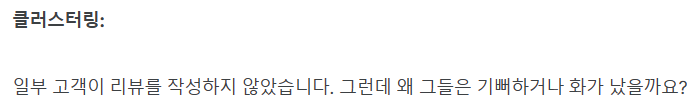

In [329]:
re_sc = pd.read_sql_query("SELECT * FROM re_sc", con=engine)

In [330]:
re_sc

,Order_id,Review_score
0,ORDER_00000,4.0
1,ORDER_00001,5.0
2,ORDER_00002,5.0
3,ORDER_00003,4.0
4,ORDER_00004,5.0
...,...,...
87344,ORDER_88083,5.0
87345,ORDER_88084,4.0
87346,ORDER_88085,5.0
87347,ORDER_88086,2.0


In [332]:
orders

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07
...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15


In [353]:
df = orders.copy()

In [337]:
from datetime import datetime

In [339]:
def extract_date(date_string):
    datetime_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
    return datetime_object.date()

In [341]:
df['Order_purchase_timestamp'] = df['Order_purchase_timestamp'].dt.date

In [345]:
df['Order_delivered_carrier_date'] = df['Order_delivered_carrier_date'].dt.date
df['Order_delivered_customer_date'] = df['Order_delivered_customer_date'].dt.date

In [346]:
df

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02,2018-10-04,2018-10-10,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13,2019-02-14,2019-02-16,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09,2018-07-11,2018-07-26,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16,2018-05-22,2018-05-26,2018-06-07
...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09,2018-03-10,2018-03-17,2018-03-28
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06,2019-02-07,2019-02-28,2019-03-02
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27,2018-08-28,2018-09-21,2018-09-27
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15


In [354]:
term_re = df[['Order_id']]

ready_time : 출고 시간 - 주문 시간  
delivered_time : 도착 시간 - 주문 시간  
diff_time : 도착 예정 시간 - 실제 도착 시간  
- diff_time 는 양수일 수록 좋은 거임(일찍 도착했단 소리니까)

In [355]:
term_re['ready_time'] = df['Order_delivered_carrier_date'] - df['Order_purchase_timestamp']
term_re['delivered_time'] = df['Order_delivered_customer_date'] - df['Order_purchase_timestamp']
term_re['diff_time'] = df['Order_estimated_delivery_date'] - df['Order_delivered_customer_date']

/tmp/ipykernel_7215/1706376232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_re['ready_time'] = df['Order_delivered_carrier_date'] - df['Order_purchase_timestamp']
/tmp/ipykernel_7215/1706376232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_re['delivered_time'] = df['Order_delivered_customer_date'] - df['Order_purchase_timestamp']
/tmp/ipykernel_7215/1706376232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [356]:
term_re

,Order_id,ready_time,delivered_time,diff_time
0,ORDER_00000,2 days 08:58:27,8 days 10:28:40,7 days 02:34:47
1,ORDER_00001,3 days 18:11:53,13 days 05:00:36,12 days 23:31:18
2,ORDER_00002,0 days 22:27:55,2 days 20:58:23,9 days 05:42:58
3,ORDER_00003,1 days 17:00:59,16 days 13:00:50,5 days 13:02:05
4,ORDER_00004,5 days 20:57:16,9 days 23:45:21,11 days 11:04:09
...,...,...,...,...
87950,ORDER_88083,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59
87951,ORDER_88084,1 days 10:23:44,22 days 04:38:58,1 days 06:22:04
87952,ORDER_88085,1 days 06:05:43,24 days 20:37:34,5 days 12:35:43
87953,ORDER_88086,3 days 18:06:36,17 days 02:04:27,20 days 00:27:06


In [360]:
term_re2 = pd.merge(term_re, re_sc, on='Order_id', how='left')

In [361]:
term_re2

,Order_id,ready_time,delivered_time,diff_time,Review_score
0,ORDER_00000,2 days 08:58:27,8 days 10:28:40,7 days 02:34:47,4.0
1,ORDER_00001,3 days 18:11:53,13 days 05:00:36,12 days 23:31:18,5.0
2,ORDER_00002,0 days 22:27:55,2 days 20:58:23,9 days 05:42:58,5.0
3,ORDER_00003,1 days 17:00:59,16 days 13:00:50,5 days 13:02:05,4.0
4,ORDER_00004,5 days 20:57:16,9 days 23:45:21,11 days 11:04:09,5.0
...,...,...,...,...,...
87950,ORDER_88083,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,5.0
87951,ORDER_88084,1 days 10:23:44,22 days 04:38:58,1 days 06:22:04,4.0
87952,ORDER_88085,1 days 06:05:43,24 days 20:37:34,5 days 12:35:43,5.0
87953,ORDER_88086,3 days 18:06:36,17 days 02:04:27,20 days 00:27:06,2.0


In [381]:
term_re2.loc[term_re2['Review_score']=='NaN']

,Order_id,ready_time,delivered_time,diff_time,Review_score


In [368]:
term_re2.loc[term_re2['Order_id']=='ORDER_81001']

,Order_id,ready_time,delivered_time,diff_time,Review_score
80881,ORDER_81001,6 days 03:10:36,7 days 12:22:19,12 days 00:35:17,4.0


In [374]:
term_re2['Review_score'].value_counts()

Review_score
5.000000    51374
4.000000    17213
1.000000     8653
3.000000     7303
2.000000     2691
4.500000       52
2.500000       30
3.500000       23
1.500000        8
3.333333        1
4.333333        1
Name: count, dtype: int64

In [385]:
re_sc.loc[re_sc['Order_id']=='ORDER_52855']

,Order_id,Review_score
52415,ORDER_52855,5.0


In [387]:
# 아우 답 없어서 지피티 도움 요청함

In [388]:
no_re = term_re2[term_re2.isnull().any(axis=1)]

In [389]:
no_re

,Order_id,ready_time,delivered_time,diff_time,Review_score
13,ORDER_00013,0 days 23:18:26,17 days 06:38:16,16 days 22:21:01,NaN
274,ORDER_00274,4 days 12:57:55,32 days 13:19:32,-7 days +05:55:02,NaN
333,ORDER_00333,10 days 18:29:56,19 days 13:39:48,7 days 16:06:18,NaN
340,ORDER_00340,1 days 03:46:49,9 days 05:27:25,19 days 07:22:24,NaN
357,ORDER_00357,4 days 07:37:46,10 days 10:27:41,8 days 03:27:43,NaN
...,...,...,...,...,...
87292,ORDER_87423,1 days 16:02:55,7 days 18:49:10,13 days 09:50:39,NaN
87368,ORDER_87500,3 days 00:10:40,8 days 04:33:23,12 days 04:12:16,NaN
87572,ORDER_87704,2 days 23:40:32,23 days 21:14:32,-6 days +08:27:08,NaN
87684,ORDER_87816,0 days 20:55:00,9 days 08:24:10,13 days 14:16:00,NaN


In [390]:
term_re2['review'] = 0

In [391]:
term_re2

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
0,ORDER_00000,2 days 08:58:27,8 days 10:28:40,7 days 02:34:47,4.0,0
1,ORDER_00001,3 days 18:11:53,13 days 05:00:36,12 days 23:31:18,5.0,0
2,ORDER_00002,0 days 22:27:55,2 days 20:58:23,9 days 05:42:58,5.0,0
3,ORDER_00003,1 days 17:00:59,16 days 13:00:50,5 days 13:02:05,4.0,0
4,ORDER_00004,5 days 20:57:16,9 days 23:45:21,11 days 11:04:09,5.0,0
...,...,...,...,...,...,...
87950,ORDER_88083,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,5.0,0
87951,ORDER_88084,1 days 10:23:44,22 days 04:38:58,1 days 06:22:04,4.0,0
87952,ORDER_88085,1 days 06:05:43,24 days 20:37:34,5 days 12:35:43,5.0,0
87953,ORDER_88086,3 days 18:06:36,17 days 02:04:27,20 days 00:27:06,2.0,0


In [393]:
term_re2.loc[term_re2['Review_score'].notnull(), 'review'] = 1

In [394]:
term_re2

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
0,ORDER_00000,2 days 08:58:27,8 days 10:28:40,7 days 02:34:47,4.0,1
1,ORDER_00001,3 days 18:11:53,13 days 05:00:36,12 days 23:31:18,5.0,1
2,ORDER_00002,0 days 22:27:55,2 days 20:58:23,9 days 05:42:58,5.0,1
3,ORDER_00003,1 days 17:00:59,16 days 13:00:50,5 days 13:02:05,4.0,1
4,ORDER_00004,5 days 20:57:16,9 days 23:45:21,11 days 11:04:09,5.0,1
...,...,...,...,...,...,...
87950,ORDER_88083,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,5.0,1
87951,ORDER_88084,1 days 10:23:44,22 days 04:38:58,1 days 06:22:04,4.0,1
87952,ORDER_88085,1 days 06:05:43,24 days 20:37:34,5 days 12:35:43,5.0,1
87953,ORDER_88086,3 days 18:06:36,17 days 02:04:27,20 days 00:27:06,2.0,1


In [395]:
rdt = term_re2['review'].corr(term_re2['ready_time'])
dlt = term_re2['review'].corr(term_re2['delivered_time'])
dft = term_re2['review'].corr(term_re2['diff_time'])

In [396]:
rdt

-0.02054818088031785

In [397]:
dlt

-0.053222580310112004

In [398]:
dft

0.04630624274948376

In [399]:
# 리뷰 작성 여부와 배송은 관련이 없다고 하네요...

## 리뷰 평균 별점이 2.5점 이하인 애들은 왜 그럴까? 배송과 관련이 있을까?
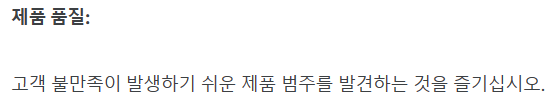

In [401]:
term_re2

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
0,ORDER_00000,2 days 08:58:27,8 days 10:28:40,7 days 02:34:47,4.0,1
1,ORDER_00001,3 days 18:11:53,13 days 05:00:36,12 days 23:31:18,5.0,1
2,ORDER_00002,0 days 22:27:55,2 days 20:58:23,9 days 05:42:58,5.0,1
3,ORDER_00003,1 days 17:00:59,16 days 13:00:50,5 days 13:02:05,4.0,1
4,ORDER_00004,5 days 20:57:16,9 days 23:45:21,11 days 11:04:09,5.0,1
...,...,...,...,...,...,...
87950,ORDER_88083,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,5.0,1
87951,ORDER_88084,1 days 10:23:44,22 days 04:38:58,1 days 06:22:04,4.0,1
87952,ORDER_88085,1 days 06:05:43,24 days 20:37:34,5 days 12:35:43,5.0,1
87953,ORDER_88086,3 days 18:06:36,17 days 02:04:27,20 days 00:27:06,2.0,1


In [414]:
# 2.5점 이하

In [411]:
bad_re = term_re2.loc[term_re2['Review_score']<=2.5]

In [404]:
bad_re

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
5,ORDER_00005,2 days 19:47:22,9 days 19:39:01,31 days 09:51:50,1.0,1
7,ORDER_00007,1 days 15:59:30,12 days 15:37:21,8 days 12:41:29,1.0,1
17,ORDER_00017,18 days 03:18:33,21 days 07:52:16,-12 days +01:36:14,2.0,1
21,ORDER_00021,5 days 22:38:29,28 days 22:17:01,-10 days +01:56:06,2.0,1
22,ORDER_00022,1 days 13:23:47,12 days 15:20:42,31 days 08:39:05,1.0,1
...,...,...,...,...,...,...
87918,ORDER_88051,3 days 01:00:27,11 days 05:00:35,13 days 04:24:23,1.0,1
87937,ORDER_88070,4 days 20:10:31,39 days 20:12:48,-22 days +06:53:01,1.0,1
87939,ORDER_88072,1 days 01:24:40,20 days 05:01:13,-3 days +23:11:29,1.0,1
87946,ORDER_88079,0 days 10:32:44,37 days 05:52:33,-9 days +08:14:46,1.0,1


In [405]:
rdt2 = bad_re['Review_score'].corr(bad_re['ready_time'])
dlt2 = bad_re['Review_score'].corr(bad_re['delivered_time'])
dft2 = bad_re['Review_score'].corr(bad_re['diff_time'])

In [406]:
rdt2

-0.049001870352774604

In [407]:
dlt2

-0.13387988159149566

In [408]:
dft2

0.13171018511263743

In [413]:
# 2점 이하

In [410]:
bad_re2 = term_re2.loc[term_re2['Review_score']<=2]

In [412]:
bad_re2

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
5,ORDER_00005,2 days 19:47:22,9 days 19:39:01,31 days 09:51:50,1.0,1
7,ORDER_00007,1 days 15:59:30,12 days 15:37:21,8 days 12:41:29,1.0,1
17,ORDER_00017,18 days 03:18:33,21 days 07:52:16,-12 days +01:36:14,2.0,1
21,ORDER_00021,5 days 22:38:29,28 days 22:17:01,-10 days +01:56:06,2.0,1
22,ORDER_00022,1 days 13:23:47,12 days 15:20:42,31 days 08:39:05,1.0,1
...,...,...,...,...,...,...
87918,ORDER_88051,3 days 01:00:27,11 days 05:00:35,13 days 04:24:23,1.0,1
87937,ORDER_88070,4 days 20:10:31,39 days 20:12:48,-22 days +06:53:01,1.0,1
87939,ORDER_88072,1 days 01:24:40,20 days 05:01:13,-3 days +23:11:29,1.0,1
87946,ORDER_88079,0 days 10:32:44,37 days 05:52:33,-9 days +08:14:46,1.0,1


In [415]:
rdt3 = bad_re2['Review_score'].corr(bad_re2['ready_time'])
dlt3 = bad_re2['Review_score'].corr(bad_re2['delivered_time'])
dft3 = bad_re2['Review_score'].corr(bad_re2['diff_time'])

In [416]:
rdt3

-0.05135790533527993

In [417]:
dlt3

-0.1345272530300412

In [418]:
dft3

0.1322439197044339

In [420]:
bad_re3 = term_re2.loc[term_re2['Review_score']<=1]

In [421]:
bad_re3

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
5,ORDER_00005,2 days 19:47:22,9 days 19:39:01,31 days 09:51:50,1.0,1
7,ORDER_00007,1 days 15:59:30,12 days 15:37:21,8 days 12:41:29,1.0,1
22,ORDER_00022,1 days 13:23:47,12 days 15:20:42,31 days 08:39:05,1.0,1
27,ORDER_00027,1 days 15:49:30,18 days 15:12:55,9 days 11:31:26,1.0,1
37,ORDER_00037,18 days 23:46:17,33 days 21:31:35,-8 days +05:00:37,1.0,1
...,...,...,...,...,...,...
87913,ORDER_88046,0 days 21:38:26,22 days 22:10:52,-4 days +04:00:11,1.0,1
87918,ORDER_88051,3 days 01:00:27,11 days 05:00:35,13 days 04:24:23,1.0,1
87937,ORDER_88070,4 days 20:10:31,39 days 20:12:48,-22 days +06:53:01,1.0,1
87939,ORDER_88072,1 days 01:24:40,20 days 05:01:13,-3 days +23:11:29,1.0,1


In [423]:
rdt4 = bad_re3['Review_score'].corr(bad_re3['ready_time'])

In [424]:
dlt4 = bad_re3['Review_score'].corr(bad_re3['delivered_time'])

In [425]:
dft4 = bad_re3['Review_score'].corr(bad_re3['diff_time'])

In [426]:
rdt4

nan

In [427]:
dlt4

nan

In [428]:
dft4

nan

In [429]:
# 배송이 딱히 리뷰 점수에 영향을 미치는 건 아니네..
# 1 이하는 더더욱 없음 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ

In [430]:
# 그럼 다시 반대로 봐야지 좋은 점수에 영향이 있는가?

In [433]:
bad_re5 = term_re2.loc[term_re2['Review_score']>2.5]

In [434]:
bad_re5

,Order_id,ready_time,delivered_time,diff_time,Review_score,review
0,ORDER_00000,2 days 08:58:27,8 days 10:28:40,7 days 02:34:47,4.0,1
1,ORDER_00001,3 days 18:11:53,13 days 05:00:36,12 days 23:31:18,5.0,1
2,ORDER_00002,0 days 22:27:55,2 days 20:58:23,9 days 05:42:58,5.0,1
3,ORDER_00003,1 days 17:00:59,16 days 13:00:50,5 days 13:02:05,4.0,1
4,ORDER_00004,5 days 20:57:16,9 days 23:45:21,11 days 11:04:09,5.0,1
...,...,...,...,...,...,...
87949,ORDER_88082,6 days 01:17:40,11 days 02:02:56,15 days 12:51:52,5.0,1
87950,ORDER_88083,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,5.0,1
87951,ORDER_88084,1 days 10:23:44,22 days 04:38:58,1 days 06:22:04,4.0,1
87952,ORDER_88085,1 days 06:05:43,24 days 20:37:34,5 days 12:35:43,5.0,1


In [435]:
rdt5 = bad_re5['Review_score'].corr(bad_re5['ready_time'])
dlt5 = bad_re5['Review_score'].corr(bad_re5['delivered_time'])
dft5 = bad_re5['Review_score'].corr(bad_re5['diff_time'])

In [436]:
rdt5

-0.07426788989005069

In [437]:
dlt5

-0.1535732827219712

In [438]:
dft5

0.10121537281856989

In [449]:
bad_re6 = term_re2.loc[term_re2['Review_score']>=3]

In [450]:
rdt6 = bad_re6['Review_score'].corr(bad_re6['ready_time'])
dlt6 = bad_re6['Review_score'].corr(bad_re6['delivered_time'])
dft6 = bad_re6['Review_score'].corr(bad_re6['diff_time'])

In [451]:
rdt6

-0.07426788989005069

In [452]:
dlt6

-0.1535732827219712

In [453]:
dft6

0.10121537281856989

In [454]:
bad_re7 = term_re2.loc[term_re2['Review_score']>=4]

In [455]:
rdt7 = bad_re7['Review_score'].corr(bad_re7['ready_time'])
dlt7 = bad_re7['Review_score'].corr(bad_re7['delivered_time'])
dft7 = bad_re7['Review_score'].corr(bad_re7['diff_time'])

In [456]:
rdt7

-0.049581868387075005

In [457]:
dlt7

-0.10004887227006681

In [458]:
dft7

0.05819600862492625

In [460]:
bad_re8 = term_re2.loc[term_re2['Review_score']==5]

In [461]:
rdt8 = bad_re8['Review_score'].corr(bad_re8['ready_time'])
dlt8 = bad_re8['Review_score'].corr(bad_re8['delivered_time'])
dft8 = bad_re8['Review_score'].corr(bad_re8['diff_time'])

/home/hyun/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/hyun/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [462]:
# 리뷰 점수 좋은 것도 배송이랑은 상관이 전혀 없네

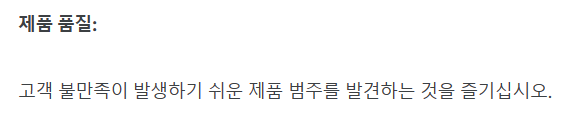  
한다고 뭐 나오려나